In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def q_gaus(q, r, sigma):
    x = np.linspace(-r/2., r/2., r)
    x_norm = x/sigma
    y = np.exp(-x_norm**2/2) / np.sqrt(2*np.pi*sigma**2)
    y = y * (x[1]-x[0])
    
    if isinstance(q, np.ndarray):
        qv = np.array([v * y for v in q])
    else:
        qv = q*y
    return qv

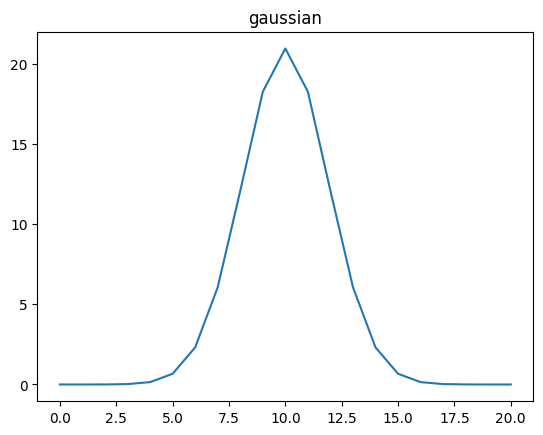

In [15]:
r = 20
sigma = 2
q = q_gaus(q=100, r=21, sigma=sigma)
plt.title('gaussian')
plt.plot(q)

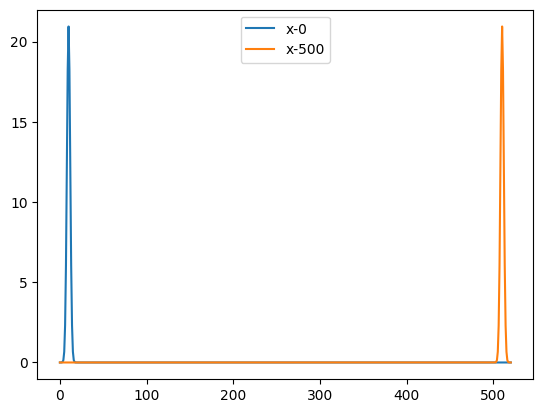

In [16]:
npoints = 500
q1 = np.append(q, np.zeros(npoints))
q2 = np.append(np.zeros(npoints), q)
fig, ax = plt.subplots()
ax.plot(q1, label='x-0')
ax.plot(q2, label='x-500')
ax.legend()

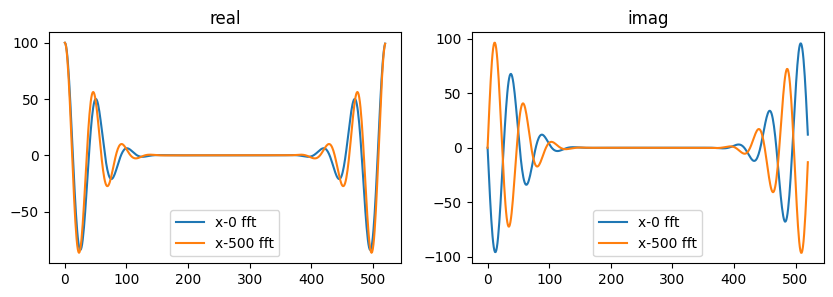

In [17]:
q1_fft = np.fft.fft(q1)
q2_fft = np.fft.fft(q2)

fig2 = plt.figure(figsize=(5*2, 3))

ax21 = fig2.add_subplot(121)
ax22 = fig2.add_subplot(122)

ax21.set_title('real')
ax21.plot(np.real(q1_fft), label='x-0 fft')
ax21.plot(np.real(q2_fft), label='x-500 fft')
ax21.legend()

ax22.set_title('imag')
ax22.plot(np.imag(q1_fft), label='x-0 fft')
ax22.plot(np.imag(q2_fft), label='x-500 fft')
ax22.legend()

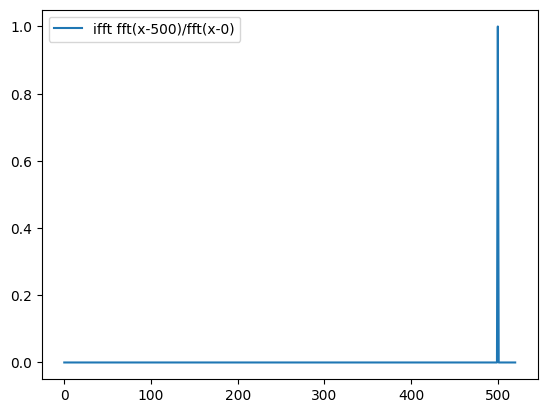

In [18]:
q0 = np.fft.ifft(q2_fft/q1_fft)
fig3, ax3 = plt.subplots()
ax3.plot(q0, label='ifft fft(x-500)/fft(x-0)')
ax3.legend()